# Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Principal Components

In [35]:
repo = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Analysis/pca_loadings/'

components = pd.read_csv(repo + 'census_ss_loadings.csv')

components

,PC1,PC2,PC3
0,0.243359,-0.621418,-0.538518
1,-1.165074,-0.117813,1.159598
2,0.241616,-1.883425,-0.021387
3,-0.943044,-0.399704,0.326187
4,-0.699336,-0.838263,1.388388
...,...,...,...
3216,-0.171748,-1.193146,0.127041
3217,-1.900711,1.731057,-0.857640
3218,0.207718,0.006282,-0.152389
3219,1.085174,-1.119617,0.649587


# Nearest Neighbors

In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(components)
distances, indices = nbrs.kneighbors(components)
print(f'Distances:\n{distances}\n\nIndices:\n{indices}')

Distances:
[[0.         0.15112035]
 [0.         0.05412471]
 [0.         0.17150628]
 ...
 [0.         0.22317987]
 [0.         0.17464636]
 [0.         0.20337661]]

Indices:
[[   0 2176]
 [   1 3002]
 [   2 1263]
 ...
 [3218 2039]
 [3219   70]
 [3220  967]]


# Plotting K-Distance
Finds value of epsilon

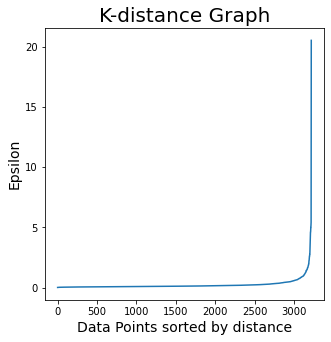

In [37]:
%matplotlib inline

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

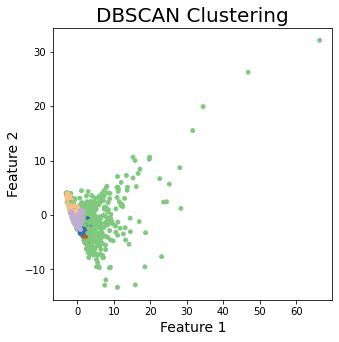

In [29]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(components)

components['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(components['PC1'],components['PC2'],c=components['DBSCAN_labels'],cmap='Accent',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K-Means

In [38]:
from sklearn.cluster import KMeans

def kmeans_elbow(X):
    wcss=[]
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
    plt.xlabel('K Value')
    plt.ylabel('WCSS')
    return plt.show()

In [39]:
def kmeans_cluster(df, X):
    tmp      = df
    kmeans   = KMeans(n_clusters = 5)
    clusters = kmeans.fit_predict(X)
    tmp['label'] = clusters
    return tmp

In [40]:
#%pylab
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def plot_k(df): 
   
    fig = plt.figure(figsize(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['PC1'][df.label == 0], df['PC2'][df.label == 0],df['PC3'][df.label == 0],c='blue', s=60)
    ax.scatter(df['PC1'][df.label == 1], df['PC2'][df.label == 1],df['PC3'][df.label == 1],c='red', s=60)
    ax.scatter(df['PC1'][df.label == 2], df['PC2'][df.label == 2],df['PC3'][df.label == 2],c='green', s=60)
    ax.scatter(df['PC1'][df.label == 3], df['PC2'][df.label == 3],df['PC3'][df.label == 3],c='orange', s=60)
    ax.scatter(df['PC1'][df.label == 4], df['PC2'][df.label == 4],df['PC3'][df.label == 4],c='purple', s=60)
    ax.view_init(30,185)

    ### CHECK/ VALIDATE THESE!!!!
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    ax.set_zlabel('PC3')

    plt.show()

# Data

In [41]:
repo_a = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Analysis/pca_loadings/'

components  = pd.read_csv(repo_a + 'census_ss_loadings.csv')

display(components)

X = components.iloc[:, :].values
X

,PC1,PC2,PC3
0,0.243359,-0.621418,-0.538518
1,-1.165074,-0.117813,1.159598
2,0.241616,-1.883425,-0.021387
3,-0.943044,-0.399704,0.326187
4,-0.699336,-0.838263,1.388388
...,...,...,...
3216,-0.171748,-1.193146,0.127041
3217,-1.900711,1.731057,-0.857640
3218,0.207718,0.006282,-0.152389
3219,1.085174,-1.119617,0.649587


array([[ 0.24335875, -0.62141774, -0.538518  ],
       [-1.16507442, -0.11781283,  1.15959811],
       [ 0.24161591, -1.88342492, -0.02138659],
       ...,
       [ 0.20771754,  0.00628234, -0.15238866],
       [ 1.08517352, -1.11961738,  0.64958744],
       [-0.107379  , -0.20474856,  0.5791296 ]])

# Elbow Curve

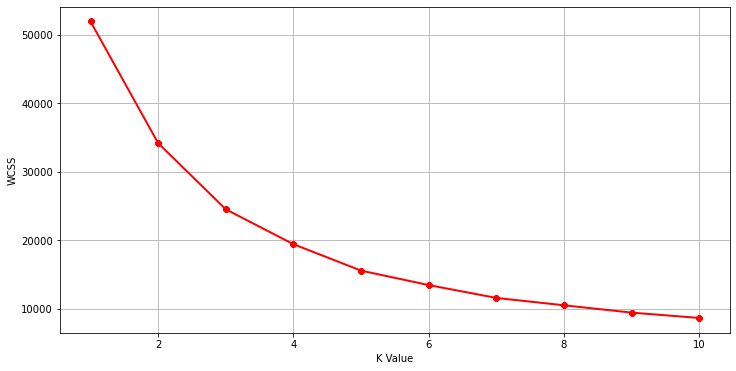

In [42]:
kmeans_elbow(X)

In [43]:
clustered_df = kmeans_cluster(components, X)
clustered_df

,PC1,PC2,PC3,label
0,0.243359,-0.621418,-0.538518,4
1,-1.165074,-0.117813,1.159598,4
2,0.241616,-1.883425,-0.021387,4
3,-0.943044,-0.399704,0.326187,4
4,-0.699336,-0.838263,1.388388,4
...,...,...,...,...
3216,-0.171748,-1.193146,0.127041,4
3217,-1.900711,1.731057,-0.857640,3
3218,0.207718,0.006282,-0.152389,4
3219,1.085174,-1.119617,0.649587,4


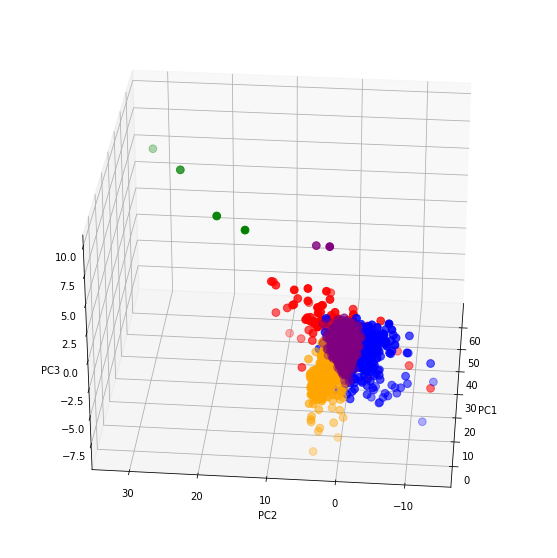

In [47]:
plot_k(clustered_df)

In [48]:
repo_d = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/'
census_data = pd.read_csv(repo_d + 'census.csv')

census_data[['GEOID']].join(clustered_df[['label']])

,GEOID,label
0,20161,4
1,19159,4
2,30009,4
3,16007,4
4,55011,4
...,...,...
3216,53003,4
3217,13043,3
3218,48451,4
3219,39089,4
